# 0. 데이터 불러오기 및 분리

## 기본적인 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
# pd.read_000 : 특정 확장자의 파일을 데이터프레임의 형태로 불러온다.
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sample_submission.csv")

## 훈련데이터 분리
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split

X = np.array(train.drop("label", axis = 1))
y = np.array(train["label"])
X_test = np.array(test)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# 1. 데이터 시각화

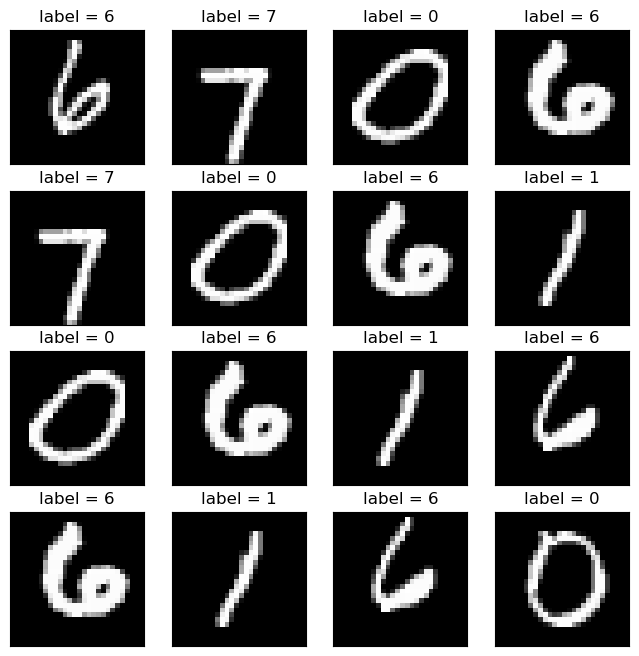

In [4]:
fig, ax = plt.subplots(4, 4, figsize = (8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(X_train[i * 4 + j * 4].reshape(28, 28), cmap = "gray")
        ax[i, j].set_title(f"label = {y_train[i * 4 + j * 4]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# 2. 모델 학습

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 1.0, class_weight = None, dual = False, fit_intercept = True,
                        intercept_scaling = 1, l1_ratio = None, max_iter = 100, multi_class = "multinomial",
                        n_jobs = -1, penalty = "l2", random_state = None, solver = "lbfgs", tol = 0.001, verbose = 0,
                        warm_start = False)

clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', n_jobs=-1, tol=0.001)

# 3. 정확도 평가

In [6]:
from sklearn.metrics import accuracy_score

y_val_pred = clf.predict(X_val)
print(f"Model accuracy is {accuracy_score(y_val, y_val_pred)}")

Model accuracy is 0.9183333333333333


# 4. 옳게 예측된 데이터 시각화

In [7]:
# 옳게 예측된 데이터 변수 할당
X_val_c = X_val[y_val == y_val_pred, :]
y_val_c = y_val[y_val == y_val_pred]
y_val_pred_c = y_val_pred[y_val == y_val_pred]

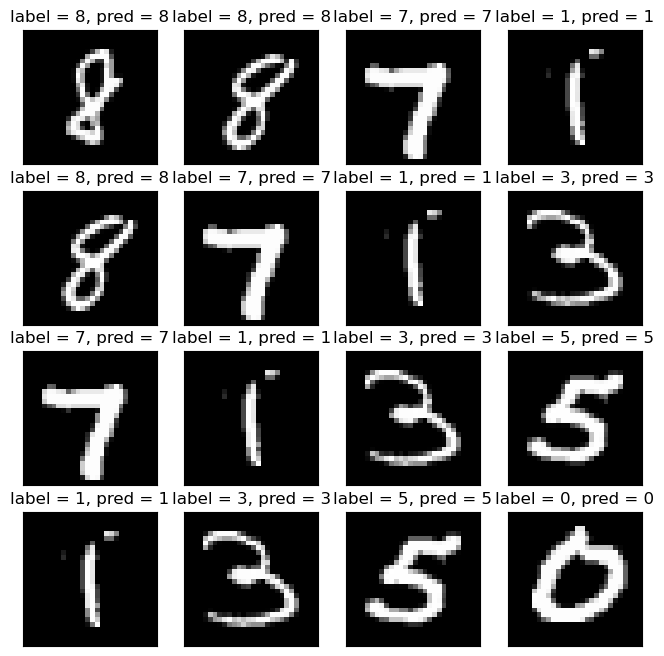

In [8]:
# 옳게 예측된 데이터 시각화
fig, ax = plt.subplots(4, 4, figsize = (8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(X_val_c[i * 4 + j * 4].reshape(28, 28), cmap = "gray")
        ax[i, j].set_title(f"label = {y_val_c[i * 4 + j * 4]}, pred = {y_val_pred_c[i * 4 + j * 4]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# 5. 틀리게 예측된 데이터 시각화

In [9]:
# 틀리게 예측된 데이터 변수 할당
X_val_ic = X_val[y_val != y_val_pred, :]
y_val_ic = y_val[y_val != y_val_pred]
y_val_pred_ic = y_val_pred[y_val != y_val_pred]

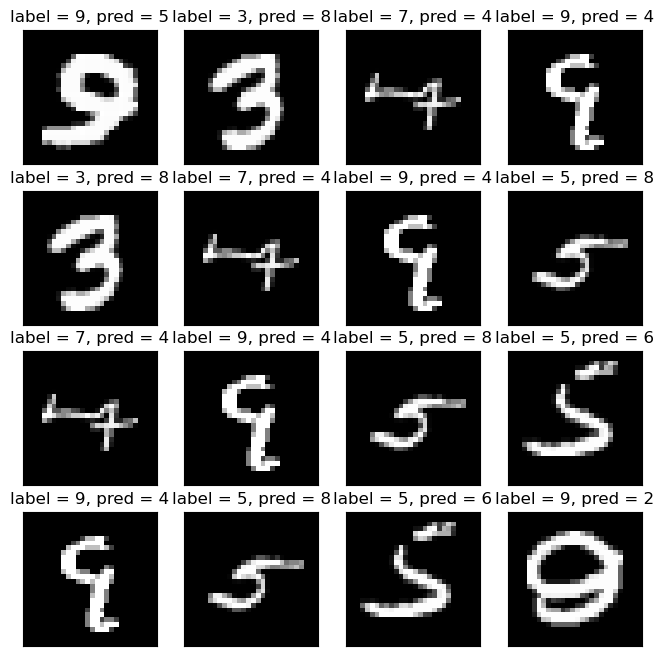

In [10]:
# 틀리게 예측된 데이터 시각화
fig, ax = plt.subplots(4, 4, figsize = (8, 8))
for i in range(4):
    for j in range(4):
        ax[i, j].imshow(X_val_ic[i * 4 + j * 4].reshape(28, 28), cmap = "gray")
        ax[i, j].set_title(f"label = {y_val_ic[i * 4 + j * 4]}, pred = {y_val_pred_ic[i * 4 + j * 4]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# 6. 테스트 데이터 사용하여 예측

In [11]:
preds = clf.predict(X_test)

# 7. 예측한 데이터 파일로 저장

In [12]:
submit["Label"] = preds
submit.to_csv("sample_submission.csv", index = False)